In [5]:
import numpy as np
import tensorflow as tf
import os
import json
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# ✅ Load preprocessed dataset
DATASET_DIR = "processed_lung_ct"
X_train = np.load(os.path.join(DATASET_DIR, "X_train.npy"))
X_val = np.load(os.path.join(DATASET_DIR, "X_val.npy"))
X_test = np.load(os.path.join(DATASET_DIR, "X_test.npy"))
y_train = np.load(os.path.join(DATASET_DIR, "y_train.npy"))
y_val = np.load(os.path.join(DATASET_DIR, "y_val.npy"))
y_test = np.load(os.path.join(DATASET_DIR, "y_test.npy"))

# ✅ Define CNN Model (4 Conv Layers)
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),  # Adjusted Dropout rate
    Dense(1, activation='sigmoid')  # Binary classification
])

# ✅ Compile Model with RMSprop optimizer and learning rate of 0.0005
model.compile(optimizer=RMSprop(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
model_checkpoint = ModelCheckpoint("cnn_lung_ct_4_best.h5", save_best_only=True, monitor='val_loss')

# ✅ Train the model & save history
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, lr_scheduler, model_checkpoint]
)

# ✅ Save training history to JSON
with open("training_history4.json", "w") as f:
    json.dump(history.history, f)

# ✅ Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.4f}")
print("✅ Best model saved as `cnn_lung_ct_4_best.h5`")


C:\Users\Dines\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6570 - loss: 9.8463   

90/90 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.6573 - loss: 9.7836 - val_accuracy: 0.5000 - val_loss: 10.3208 - learning_rate: 5.0000e-04
Epoch 2/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.7602 - loss: 0.7112 - val_accuracy: 0.5000 - val_loss: 11.0777 - learning_rate: 5.0000e-04
Epoch 3/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8442 - loss: 0.7736  

90/90 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.8442 - loss: 0.7718 - val_accuracy: 0.5278 - val_loss: 3.7159 - learning_rate: 5.0000e-04
Epoch 4/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.8674 - loss: 0.4148 - val_accuracy: 0.5000 - val_loss: 32.6061 - learning_rate: 5.0000e-04
Epoch 5/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9041 - loss: 0.2476  

90/90 ━━━━━━━━━━━━━━━━━━━━ 247s 3s/step - accuracy: 0.9041 - loss: 0.2479 - val_accuracy: 0.8444 - val_loss: 0.4333 - learning_rate: 5.0000e-04
Epoch 6/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.9244 - loss: 0.2343 - val_accuracy: 0.5056 - val_loss: 6.3497 - learning_rate: 5.0000e-04
Epoch 7/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9197 - loss: 0.2347  

90/90 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.9198 - loss: 0.2343 - val_accuracy: 0.9222 - val_loss: 0.1852 - learning_rate: 5.0000e-04
Epoch 8/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.9273 - loss: 0.2070 - val_accuracy: 0.9611 - val_loss: 0.2327 - learning_rate: 5.0000e-04
Epoch 9/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9532 - loss: 0.1287  

90/90 ━━━━━━━━━━━━━━━━━━━━ 247s 3s/step - accuracy: 0.9531 - loss: 0.1289 - val_accuracy: 0.9556 - val_loss: 0.1105 - learning_rate: 5.0000e-04
Epoch 10/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 247s 3s/step - accuracy: 0.9421 - loss: 0.1767 - val_accuracy: 0.9444 - val_loss: 0.2049 - learning_rate: 5.0000e-04
Epoch 11/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.9584 - loss: 0.1132 - val_accuracy: 0.9667 - val_loss: 0.2205 - learning_rate: 5.0000e-04
Epoch 12/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9619 - loss: 0.1168  
Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
90/90 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.9619 - loss: 0.1169 - val_accuracy: 0.9556 - val_loss: 0.1432 - learning_rate: 5.0000e-04
Epoch 13/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9742 - loss: 0.0413  

90/90 ━━━━━━━━━━━━━━━━━━━━ 248s 3s/step - accuracy: 0.9742 - loss: 0.0413 - val_accuracy: 0.9722 - val_loss: 0.0967 - learning_rate: 2.5000e-04
Epoch 14/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.9770 - loss: 0.0406 - val_accuracy: 0.9667 - val_loss: 0.1855 - learning_rate: 2.5000e-04
Epoch 15/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9868 - loss: 0.0286  

90/90 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.9868 - loss: 0.0287 - val_accuracy: 0.9889 - val_loss: 0.0937 - learning_rate: 2.5000e-04
Epoch 16/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 280s 3s/step - accuracy: 0.9835 - loss: 0.0378 - val_accuracy: 0.9778 - val_loss: 0.1534 - learning_rate: 2.5000e-04
Epoch 17/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.9831 - loss: 0.0439 - val_accuracy: 0.9722 - val_loss: 0.1741 - learning_rate: 2.5000e-04
Epoch 18/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9888 - loss: 0.0323  
Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
90/90 ━━━━━━━━━━━━━━━━━━━━ 281s 3s/step - accuracy: 0.9888 - loss: 0.0324 - val_accuracy: 0.9722 - val_loss: 0.2412 - learning_rate: 2.5000e-04
Epoch 19/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 280s 3s/step - accuracy: 0.9864 - loss: 0.0663 - val_accuracy: 0.9778 - val_loss: 0.1368 - learning_rate: 1.2500e-04
Epoch 20/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 280s 3s/step - accuracy: 0.9947 - loss: 0.

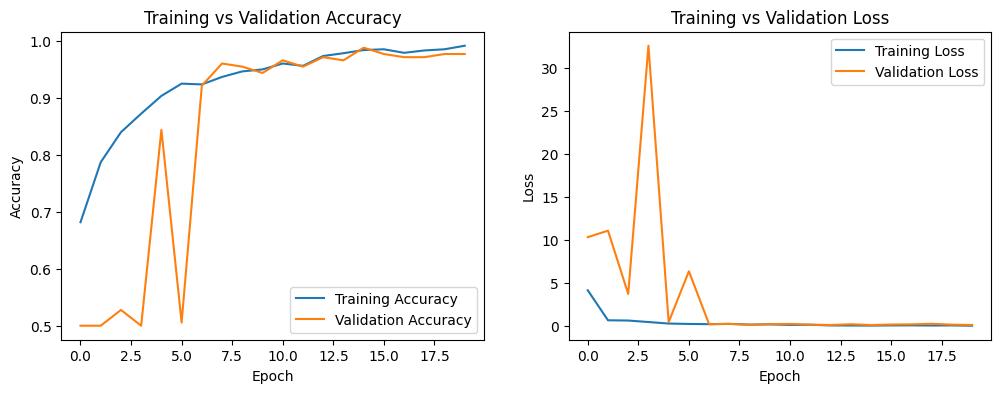

In [6]:
# ✅ Plot Training History
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training vs Validation Accuracy')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')

    plt.show()

# ✅ Call the function to plot
plot_training_history(history)


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


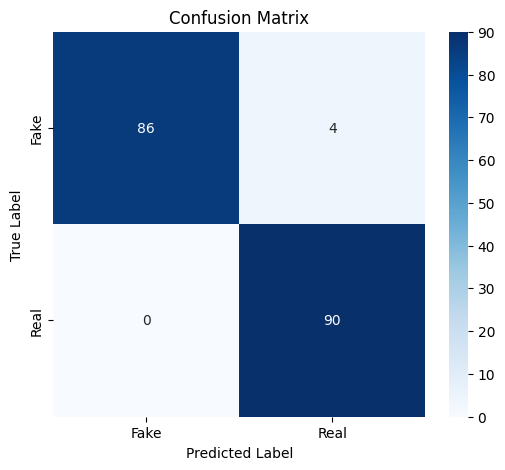

Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      0.96      0.98        90
        Real       0.96      1.00      0.98        90

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ✅ Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


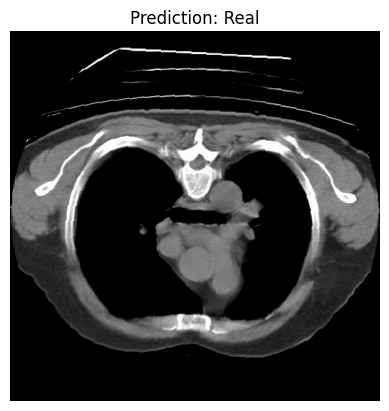

In [9]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
model = load_model("cnn_lung_ct_4_best.h5")  # Make sure this file exists

# Load and preprocess the new image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Path to new CT scan image
img_path = r"C:\Users\Dines\OneDrive\Desktop\a\f1.png"  # <-- replace this with actual path

# Predict
new_img = preprocess_image(img_path)
prediction = model.predict(new_img)

# Show result
plt.imshow(image.load_img(img_path), cmap='gray')
plt.title("Prediction: " + ("Fake" if prediction[0][0] > 0.5 else "Real"))
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


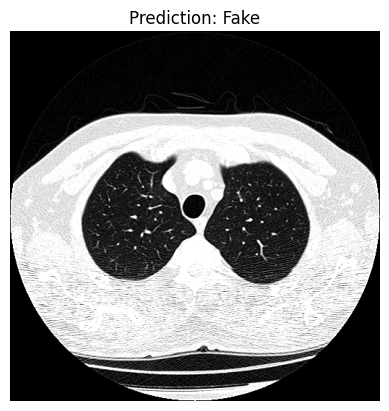

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


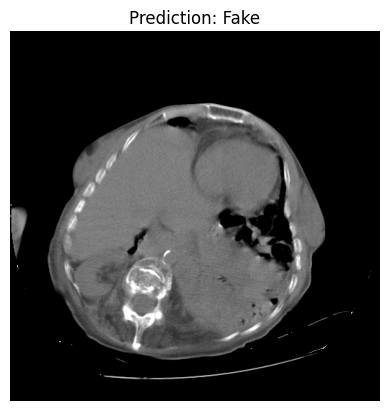

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


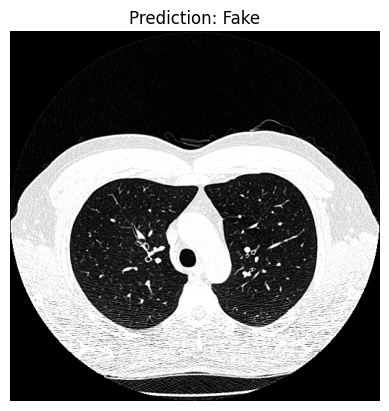

In [10]:
# List of image paths
img_paths = [
    r"C:\Users\Dines\OneDrive\Desktop\a\r1.png",
    r"C:\Users\Dines\OneDrive\Desktop\a\r2.png",
    r"C:\Users\Dines\OneDrive\Desktop\a\r3.png"
]

# Loop through each image, predict and display result
for img_path in img_paths:
    new_img = preprocess_image(img_path)
    prediction = model.predict(new_img)

    plt.imshow(image.load_img(img_path), cmap='gray')
    plt.title("Prediction: " + ("Fake" if prediction[0][0] > 0.5 else "Real"))
    plt.axis('off')
    plt.show()
